<a href="https://colab.research.google.com/github/unzh-boop/Computer-Vision-4/blob/main/segmentation_practice_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Made with colab.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls

drive  sample_data


In [6]:
cd drive/MyDrive/cv/

/content/drive/MyDrive/cv


In [7]:
!ls

 cat.jpg			    'cv s1.ipynb'		      lena.png
 cats_00420.jpg			     dog.jpg			      panda.jpg
'computer vision notebook 2.ipynb'  'fa17-bcs-043 class prac.ipynb'


In [19]:
from skimage.draw import circle_perimeter
from skimage.filters import gaussian
import numpy as np
from skimage.segmentation import active_contour
from skimage.color import rgb2gray
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
from skimage.future import graph
from skimage import data, segmentation, color, filters, io
from matplotlib import pyplot as plt

ACTIVE CONTOUR MODEL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  


(0.0, 500.0, 500.0, 0.0)

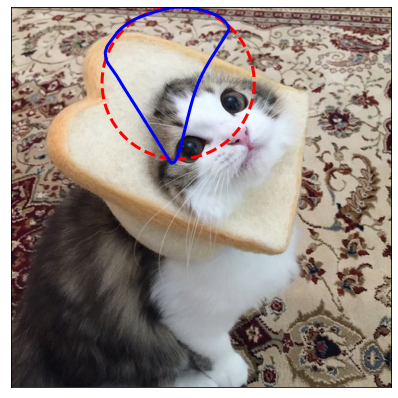

In [20]:
img = skimage.io.imread(fname="cat.jpg")

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3),init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

CHAN VASE

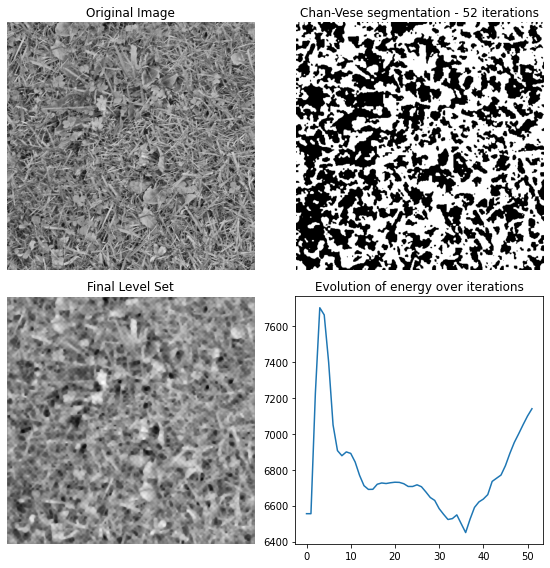

In [21]:
image = img_as_float(data.grass())

cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

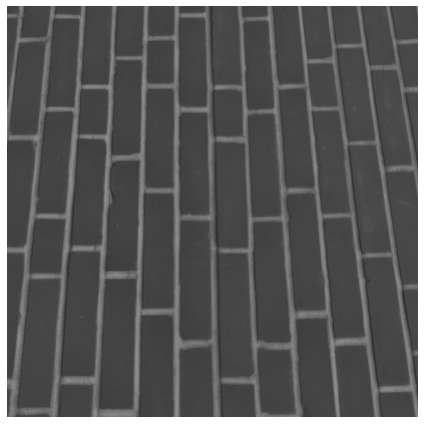

In [22]:
image = data.brick()[50:-50, 50:-50]

thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

cleared = clear_border(bw)

label_image = label(cleared)

image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    if region.area >= 100:   
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

Region Boundary based RAGs

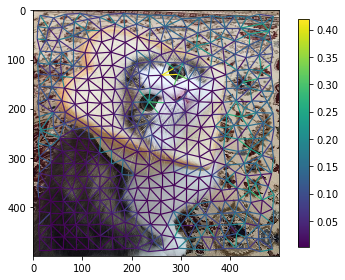

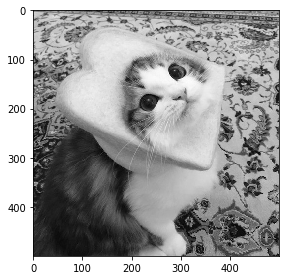

In [26]:
img = skimage.io.imread(fname="cat.jpg")
gimg = color.rgb2gray(img)

labels = segmentation.slic(img, compactness=30, n_segments=400)
edges = filters.sobel(gimg)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)
lc = graph.show_rag(labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)

plt.colorbar(lc, fraction=0.03)

io.imshow(img)
plt.show()
io.imshow(gimg)
plt.show()